Directory

In [1]:
%cd /content/drive/MyDrive/Data Mining/1. Survival Analysis

/content/drive/MyDrive/Data Mining/1. Survival Analysis


In [2]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=890fb96e62ed7b79263df9e181cd05e32b81b55134e6fd1b1e01183a09a4f770
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [5]:
import pandas as pd

Dataset

In [7]:
dataset = pd.read_csv("lung.csv")
dataset.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [8]:
#data transformation
dataset.loc[dataset.status == 1, "status"] = 0
dataset.loc[dataset.status == 2, "status"] = 1
dataset.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [11]:
#Kaplan Meier Estimator
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
model.fit(durations = dataset.time, event_observed = dataset.status)

model.event_table.head(4)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224


In [14]:
#calculate specific event

day_5 = model.event_table.iloc[1, :]
print(day_5)

surv_5 = 1 * (1 -  day_5.observed / day_5.at_risk)
print(surv_5)

day_11 = model.event_table.iloc[2, :]
print(day_11)
surv_11 = surv_5 * (1 -  day_11.observed / day_11.at_risk)
print(surv_11)

removed       1
observed      1
censored      0
entrance      0
at_risk     228
Name: 5.0, dtype: int64
0.9956140350877193
removed       3
observed      3
censored      0
entrance      0
at_risk     227
Name: 11.0, dtype: int64
0.9824561403508771


In [15]:
#Approximation

surv_11_approximate = (day_11.at_risk - day_11.observed)/ day_11.at_risk
surv_11_approximate

0.986784140969163

Visualization

Text(0, 0.5, 'Survival')

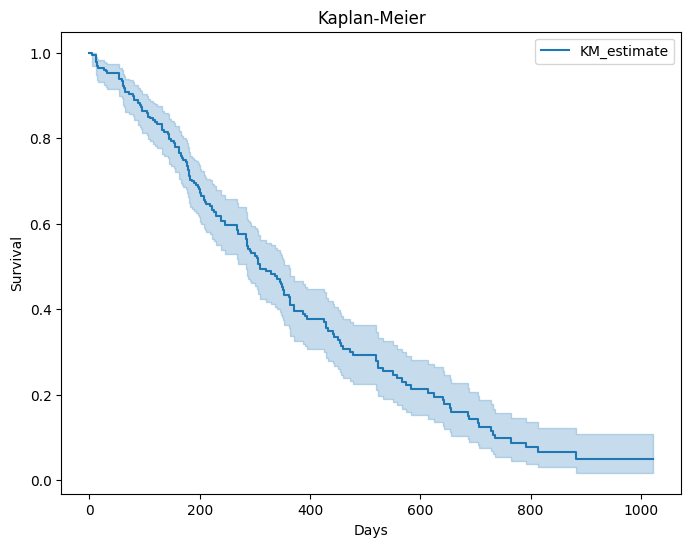

In [17]:
import matplotlib.pyplot as plt
model.plot(figsize = (8,6))
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

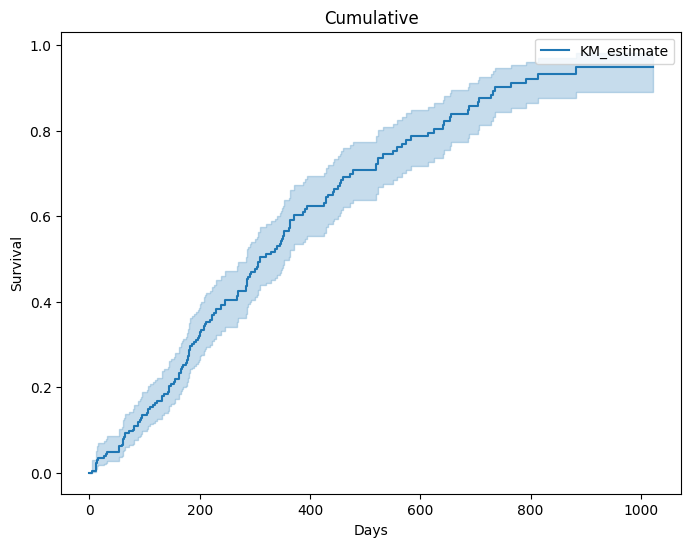

In [18]:
import matplotlib.pyplot as plt
model.plot_cumulative_density(figsize = (8,6))
plt.title("Cumulative")
plt.xlabel("Days")
plt.ylabel("Survival")

In [19]:
#Male vs Female

male = dataset.query("sex == 1")

female = dataset.query("sex == 2")
female.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0
11,16.0,654,1,68,2,2.0,70.0,70.0,NaN,23.0
12,11.0,728,1,68,2,1.0,90.0,90.0,NaN,5.0
18,1.0,61,1,56,2,2.0,60.0,60.0,238.0,10.0


In [20]:
#Kaplan Meier Gender

model_males = KaplanMeierFitter()
model_males.fit(durations = male.time, event_observed = male.status)

model_females = KaplanMeierFitter()
model_females.fit(durations = female.time, event_observed = female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

Text(0, 0.5, 'Survival')

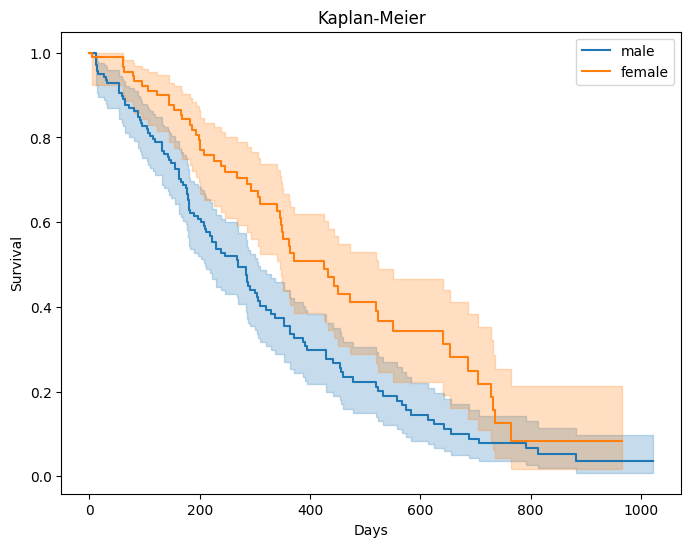

In [22]:
import matplotlib.pyplot as plt
model_males.plot(figsize = (8,6), label = "male")
model_females.plot( label = "female")
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

In [23]:
#Log Rank test

from lifelines.statistics import logrank_test
logrank_test(durations_A = male.time,
             durations_B = female.time,
             event_observed_A=male.status,
             event_observed_B=female.status)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57